In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('world_population.csv')

In [5]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

- Droping columns

In [9]:
df.drop(columns = ['Rank','CCA3'], axis = 1, inplace = True)

- Renaming Columns

In [11]:
df.rename(columns = {'Country/Territory' : 'Country'}, inplace = True)

In [13]:
df.head()

,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [15]:
df[df['Country']=='India']

,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
92,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77


- Indian Population Density (per km²) over the Years

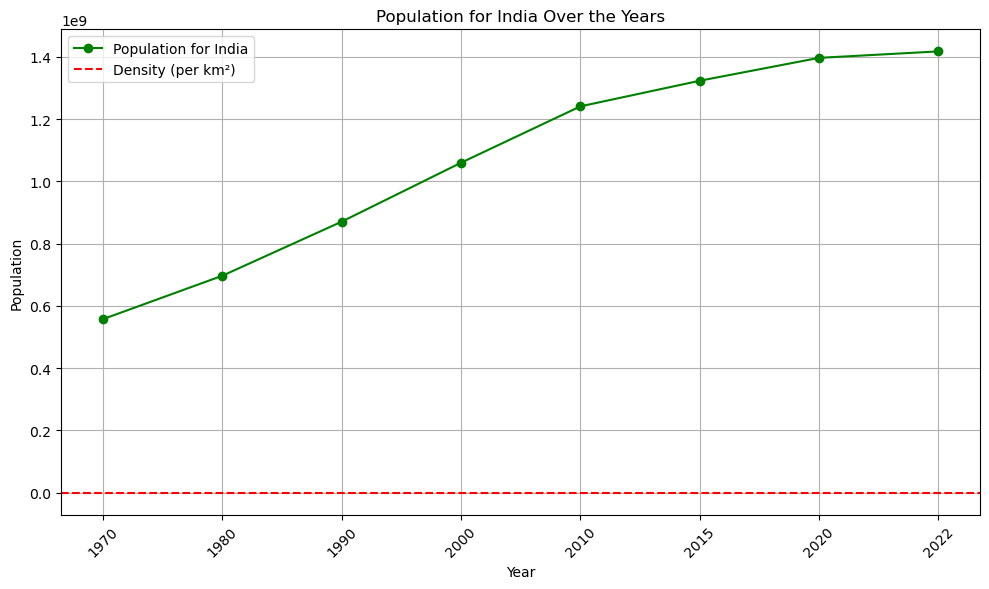

In [17]:
country_name = 'India'  
country_data = df[df['Country'] == country_name]
years = ['1970 Population', 
         '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']

population_values = country_data[years].values.flatten() 
years_labels = [year.split()[0] for year in years]  
plt.figure(figsize=(10, 6))
plt.plot(years_labels, population_values, marker='o', label=f'Population for {country_name}', color = 'green')
density_value = country_data['Density (per km²)'].values[0]
plt.axhline(y=density_value, color='red', linestyle='--', label='Density (per km²)')
plt.title(f'Population for {country_name} Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()


- Total Population Over the Years for Asia

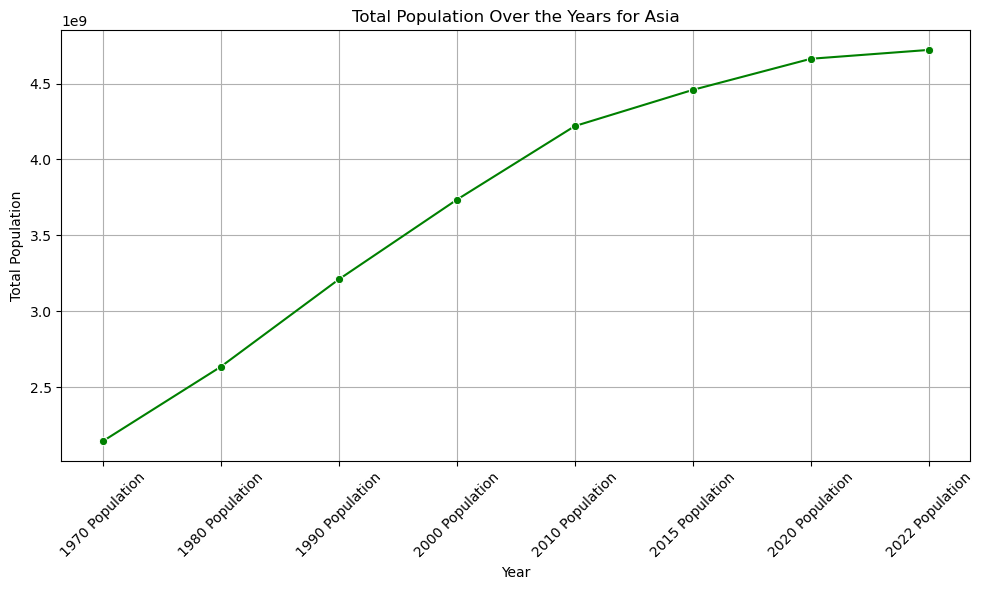

In [21]:
continent = 'Asia' 
years = ['1970 Population', 
         '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']

continent_countries = df[df['Continent'] == continent]
continent_population_values = []
for year in years:
    total_population = continent_countries[year].sum() 
    continent_population_values.append(total_population)
plot_data = pd.DataFrame({
    'Year': years,
    'Total Population': continent_population_values
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='Year', y='Total Population', marker='o', color = 'green')
plt.title(f'Total Population Over the Years for {continent}')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()  
plt.show()

- Indian Population Percentage of World Population

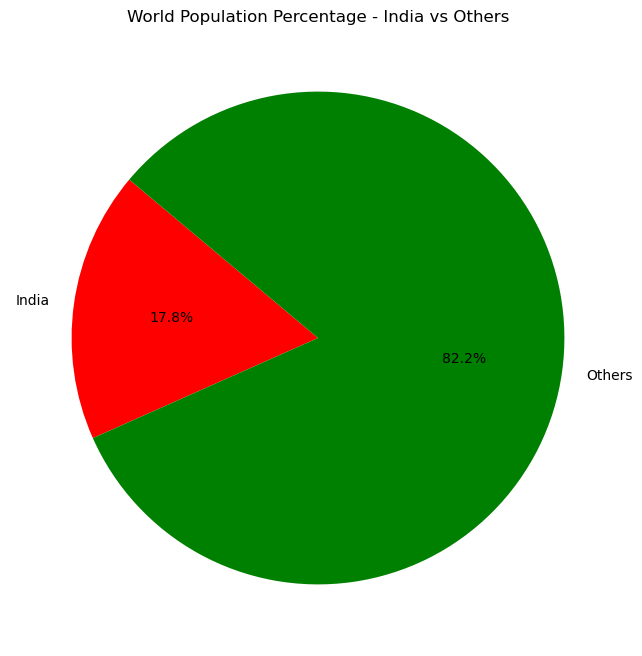

In [23]:
indian_pop = df[(df['Country'] == 'India') & (df['Continent'] == 'Asia')]
labels = ['India', 'Others']
sizes = [indian_pop['World Population Percentage'].values[0], 100 - indian_pop['World Population Percentage'].values[0]]
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red','green'])
plt.title('World Population Percentage - India vs Others')
plt.show()

                                                      Thank You